This is a Demo for using the kernels provided in ctntools git repository 'https://github.com/ctnelson/ctntools.git'
Design intent is for use as convolution kernels

Two functions are available in 1D and 2D kernels:
Gaussian & Bump (handy because smooth derivates while 0 at edges)

Created 2024 by Dr. Christopher Nelson
Oak Ridge National Laboratory

Standard Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import sys
from git import Repo,  InvalidGitRepositoryError

Custom GIT Imports

In [2]:
gitlocal = ''
for i in sys.path:
    temp=i.split('\\')
    if temp[-1]=='site-packages':
        gitlocal=i

In [3]:
#Set local git repository location
gitremote = 'https://github.com/ctnelson/ctntools.git'
gitl = os.path.join(gitlocal,'ctntools')
print(gitl)

c:\programs\Anaconda3\envs\gpuenv\lib\site-packages\ctntools


In [4]:
#check for local repo, pull if found
#clone git repo if not found locally
if os.path.exists(gitl):
    try:
        my_repo = Repo(gitl)
        o = my_repo.remotes.origin
        o.pull()
    except InvalidGitRepositoryError:
        Repo.clone_from(gitremote, gitl)
        my_repo = Repo(gitl)
else:
    Repo.clone_from(gitremote, gitl)
    my_repo = Repo(gitl)
print(my_repo)

<git.repo.base.Repo 'c:\\programs\\Anaconda3\\envs\\gpuenv\\lib\\site-packages\\ctntools\\.git'>


In [5]:
#Import custom functions from git repo
from ctntools.BaseSupportFunctions.kernels import bKernel1D, gKernel1D, gKernel2D, bKernel2D
from ctntools.BaseSupportFunctions.FWHM import FWHM

# 1D Kernels

Normalized (Area=1) 

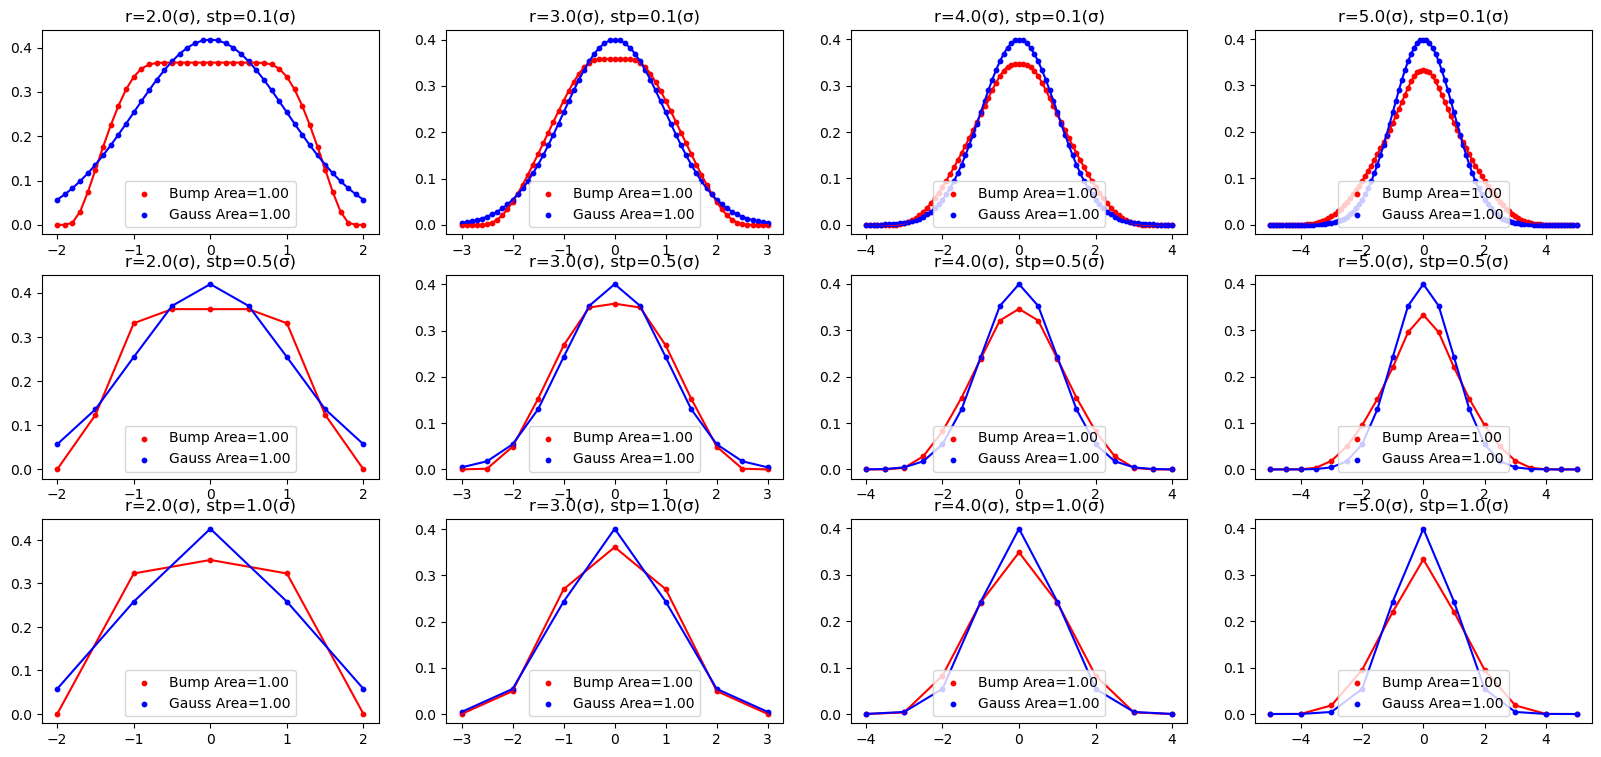

In [6]:
#This function creates several Gaussian and Bump Function kernels at various max radius and stepsize
#Normalized
normalize=True

s=1                                 #sigma
k_BumpHWHMScalar = 2*np.log(2)      #scalar to roughly match the sigma input for the gaussian & half-width-half-max input for the bump function

#grid of radial distance and radial stepsize
rdistA =np.array([2,3,4,5])         #radial max distance(s) (vector). Minimum must exceed the hwhm input (s*k_BumpHWHMScalar) for the bump function. Must be evenly divisible by stepsize.
xstpA = np.array([.1,.5,1])         #radial stepsize (vector)

#preallocate
kB = []     #list of Bump Kernels
kG = []     #list of Gauss Kernels
x = []      #list of interpolation grids

#Variable to store the calculated area of the graph
kBI = np.ones((rdistA.size,xstpA.size))*np.nan
kGI = np.ones((rdistA.size,xstpA.size))*np.nan

#loop through settings
rr,xx = np.meshgrid(rdistA,xstpA)
for r in range(rdistA.size):
    kBr = []
    kGr = []
    xr = []
    k_rdist = rdistA[r]

    for xs in range(xstpA.size):
        xstp = xstpA[xs]
        xx = np.arange(-k_rdist,k_rdist+xstp,xstp)     
        xr.append(xx)
        ind0 = ind0 = np.int64(k_rdist/xstp)

        #Gaussian
        temp = gKernel1D(s,rdist=k_rdist,rstp=xstp,normalize=normalize)
        kGI[r,xs] = np.sum((temp[ind0:-1] + temp[ind0+1:])*xstp)
        kGr.append(temp)

        #Bump
        temp = bKernel1D(k_rdist,hwhm=s*k_BumpHWHMScalar,rstp=xstp,normalize=normalize)
        kBI[r,xs] = np.sum((temp[ind0:-1] + temp[ind0+1:])*xstp)
        kBr.append(temp)

    kB.append(kBr)
    kG.append(kGr)
    x.append(xr)

#Plots
n = len(kB)
m = len(kBr)
s_ = 10
fig, ax = plt.subplots(m, n, figsize=(5*n, 3*m), dpi = 100)
for nn in range(n):
    for mm in range(m):
        #Bump
        ax[mm,nn].plot(x[nn][mm]/s,kB[nn][mm],'-r')
        ax[mm,nn].scatter(x[nn][mm]/s,kB[nn][mm],c='r',s=s_,label='Bump Area={:.2f}'.format(kBI[nn,mm]))
        ttlstr = 'r='+str(rdistA[nn]/s)+'(σ), stp='+str(xstpA[mm]/s)+'(σ)'
        ax[mm,nn].set_title(ttlstr)

        #Gaussian
        ax[mm,nn].scatter(x[nn][mm]/s,kG[nn][mm],c='b',s=s_,label='Gauss Area={:.2f}'.format(kGI[nn,mm]))
        ax[mm,nn].plot(x[nn][mm]/s,kG[nn][mm],'-b')

        ax[mm,nn].legend(loc='lower center')

Not Normalized (Center Peak Value =1) 

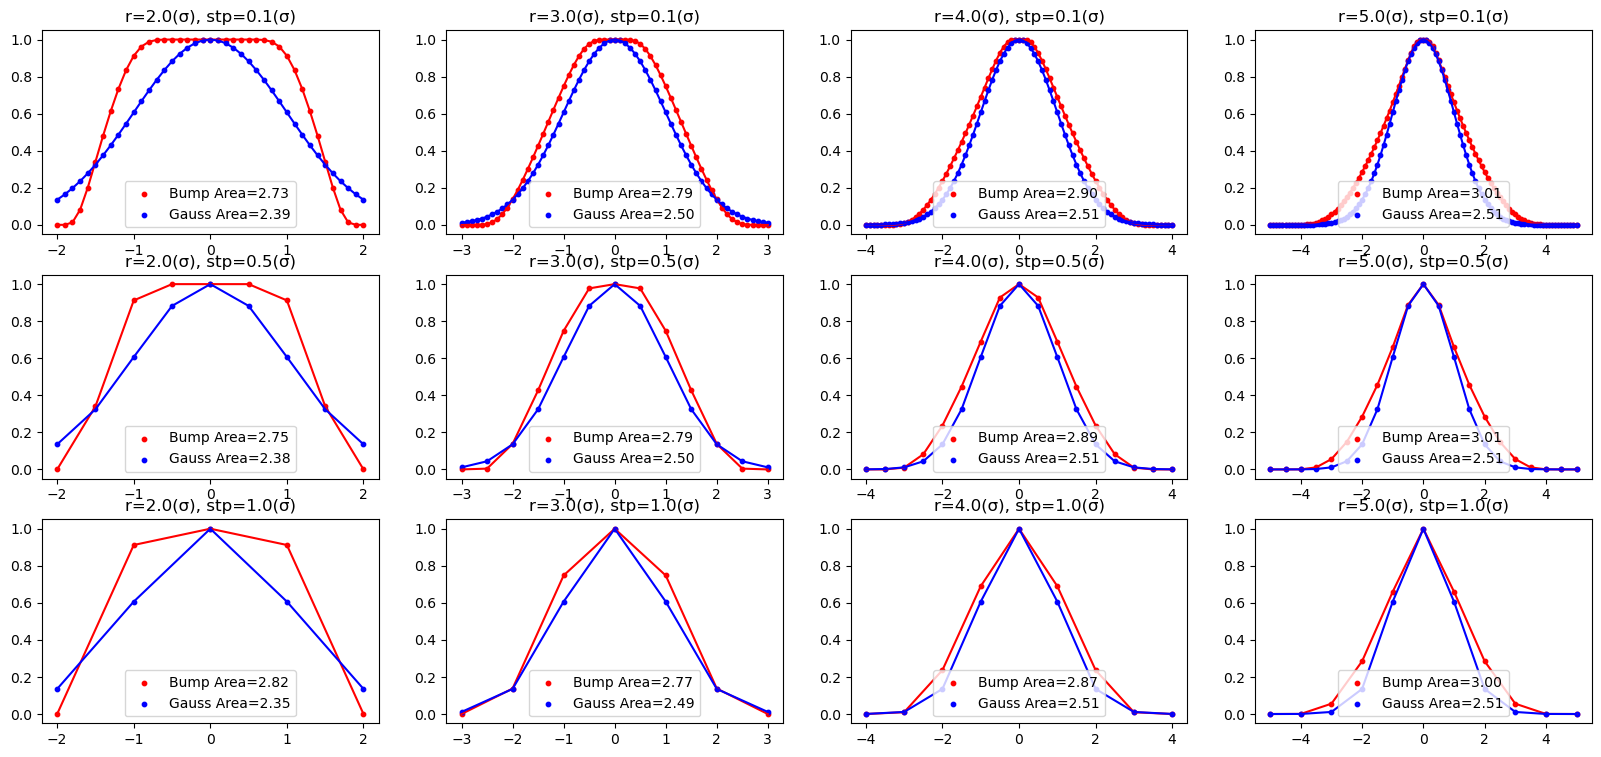

In [7]:
# Raw outputs of the kernel functions
normalize=False
s=1                                 #sigma
k_BumpHWHMScalar = 2*np.log(2)      #scalar to roughly match the sigma input for the gaussian & half-width-half-max input for the bump function

#grid of radial distance and radial stepsize
rdistA =np.array([2,3,4,5])         #radial max distance(s) (vector). Minimum must exceed the hwhm input (s*k_BumpHWHMScalar) for the bump function. Must be evenly divisible by stepsize.
xstpA = np.array([.1,.5,1])         #radial stepsize (vector)

#preallocate
kB = []     #list of Bump Kernels
kG = []     #list of Gauss Kernels
x = []      #list of interpolation grids

#Variable to store the calculated area of the graph
kBI = np.ones((rdistA.size,xstpA.size))*np.nan
kGI = np.ones((rdistA.size,xstpA.size))*np.nan

#loop through settings
rr,xx = np.meshgrid(rdistA,xstpA)
for r in range(rdistA.size):
    kBr = []
    kGr = []
    xr = []
    k_rdist = rdistA[r]

    for xs in range(xstpA.size):
        xstp = xstpA[xs]
        xx = np.arange(-k_rdist,k_rdist+xstp,xstp)     
        xr.append(xx)
        ind0 = ind0 = np.int64(k_rdist/xstp)

        #Gaussian
        temp = gKernel1D(s,rdist=k_rdist,rstp=xstp,normalize=normalize)
        kGI[r,xs] = np.sum((temp[ind0:-1] + temp[ind0+1:])*xstp)
        kGr.append(temp)

        #Bump
        temp = bKernel1D(k_rdist,hwhm=s*k_BumpHWHMScalar,rstp=xstp,normalize=normalize)
        kBI[r,xs] = np.sum((temp[ind0:-1] + temp[ind0+1:])*xstp)
        kBr.append(temp)

    kB.append(kBr)
    kG.append(kGr)
    x.append(xr)

#Plots
n = len(kB)
m = len(kBr)
s_ = 10
fig, ax = plt.subplots(m, n, figsize=(5*n, 3*m), dpi = 100)
for nn in range(n):
    for mm in range(m):
        #Bump
        ax[mm,nn].plot(x[nn][mm]/s,kB[nn][mm],'-r')
        ax[mm,nn].scatter(x[nn][mm]/s,kB[nn][mm],c='r',s=s_,label='Bump Area={:.2f}'.format(kBI[nn,mm]))
        ttlstr = 'r='+str(rdistA[nn]/s)+'(σ), stp='+str(xstpA[mm]/s)+'(σ)'
        ax[mm,nn].set_title(ttlstr)

        #Gaussian
        ax[mm,nn].scatter(x[nn][mm]/s,kG[nn][mm],c='b',s=s_,label='Gauss Area={:.2f}'.format(kGI[nn,mm]))
        ax[mm,nn].plot(x[nn][mm]/s,kG[nn][mm],'-b')

        ax[mm,nn].legend(loc='lower center')

# 2D Kernels

c:\programs\Anaconda3\envs\gpuenv\lib\site-packages\ctntools\BaseSupportFunctions\kernels.py:42: RuntimeWarning: overflow encountered in exp
  z[ind] = 1/(1 + np.exp((1-2*np.abs(r[ind])) / (r[ind]**2-np.abs(r[ind]))))


[Text(1, 0.0, '-6.00'),
 Text(1, 46.13511268039129, '-1.39'),
 Text(1, 60.0, '0.00'),
 Text(1, 73.86488731960871, '1.39'),
 Text(1, 120.0, '6.00')]

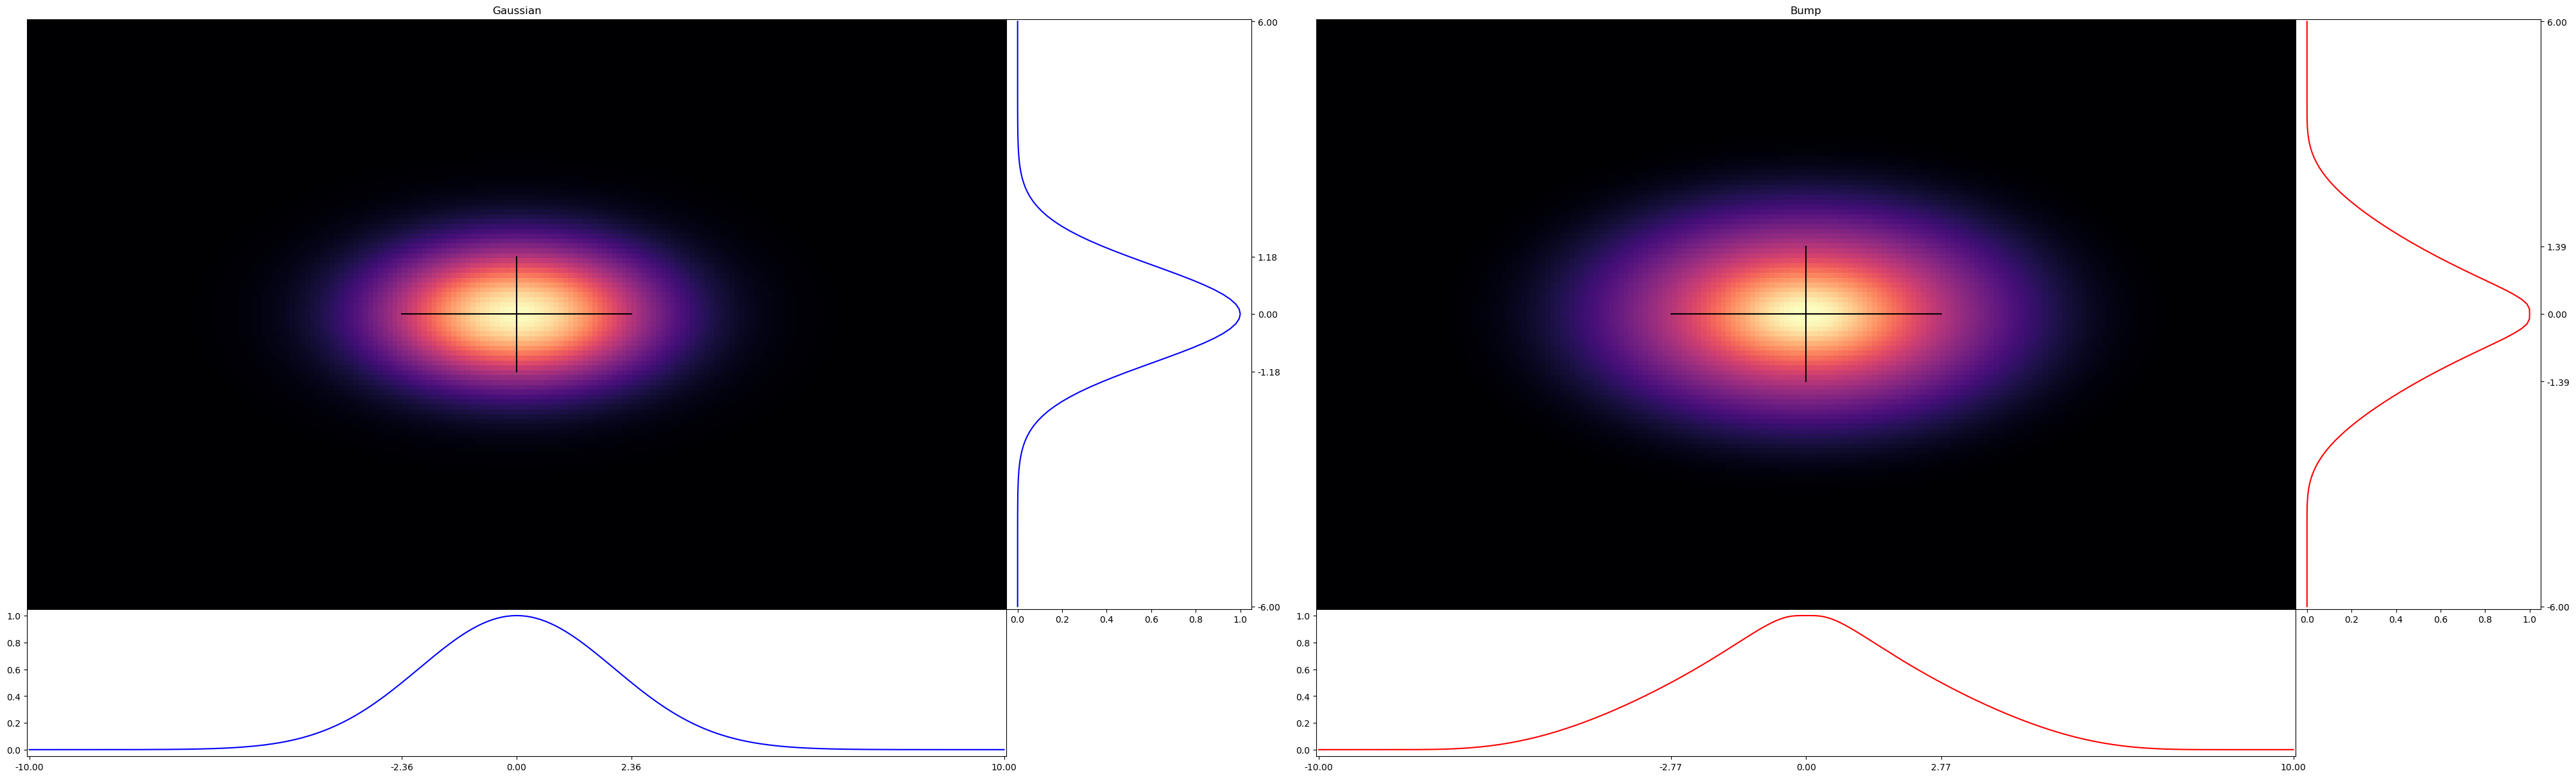

In [8]:
###### Set kernel properties
theta = np.deg2rad(25)

sig = [1,2]         #sigma
rscalar = 5         #dist cutoff (scalar of sigma)
rdist = None        #-or- directly
rstp = .1           #axis resolution
normMethod = None   #normalization

####
M = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
k_BumpHWHMScalar = 2*np.log(2)

######  Create kernels  ########
kG = gKernel2D(sig,M=M, rscalar=rscalar, rdist=rdist, rstp=rstp, normMethod=normMethod)
rdist = rscalar*np.array(sig)
kB = bKernel2D(np.array(sig)*k_BumpHWHMScalar, M=M, rdist=rdist, rstp=rstp, normMethod=normMethod)

######  Cross sections  ##########
kGcntr = ((np.array(kG.shape)-1)/2).astype('int')
kGxslice = kG[kGcntr[0],:]
kGyslice = kG[:,kGcntr[1]]
kGFWHM = np.array([FWHM(kGxslice,kGcntr[1],normalize=False), FWHM(kGyslice,kGcntr[0],normalize=False)])
kGFWHM = np.squeeze(kGFWHM)
kBcntr = ((np.array(kB.shape)-1)/2).astype('int')
kBxslice = kB[kBcntr[0],:]
kByslice = kB[:,kBcntr[1]]
kBFWHM = np.array([FWHM(kBxslice,kBcntr[1],normalize=False), FWHM(kByslice,kBcntr[0],normalize=False)])
kBFWHM = np.squeeze(kBFWHM)

#######  Plot  ########
kG_asp = kG.shape[1]/kG.shape[0]
kB_asp = kB.shape[1]/kB.shape[0]

fig = plt.figure(figsize=(12*kG_asp*2, 12),layout='constrained')
gs = fig.add_gridspec(1,2,top=1, bottom=.05, left=0., right=0.95).subplots()

#Gaussian
#axG = fig.add_gridspec(top=1, bottom=.1, left=0., right=0.4).subplots()
axG = fig.add_subplot(gs[0])
axG_xslice = axG.inset_axes([0, -.25, 1, 0.25], sharex=axG)
axG_yslice = axG.inset_axes([1, 0, 0.25, 1], sharey=axG)
#Plots
axG.imshow(kG,origin='lower',cmap='magma')
axG.plot([kGcntr[1]-kGFWHM[0]/2, kGcntr[1]+kGFWHM[0]/2],[kGcntr[0],kGcntr[0]],'-k')      #plot x slice
axG.plot([kGcntr[1],kGcntr[1]],[kGcntr[0]-kGFWHM[1]/2, kGcntr[0]+kGFWHM[1]/2],'-k')      #plot y slice
axG.set_title('Gaussian')
axG.set_axis_off()
axG_xslice.plot(np.arange(kGxslice.size),kGxslice,'-b')
axG_yslice.plot(kGyslice,np.arange(kGyslice.size),'-b')
axG_yslice.yaxis.tick_right()
#ticks
xs = np.array([(kG.shape[1]-1)/2, rstp])
xsxticks = np.array([0,xs[0]-kGFWHM[0]/2,xs[0],xs[0]+kGFWHM[0]/2,kG.shape[1]-1])
xsxtstr = ["%.2f" % x for x in (xsxticks-xs[0])*xs[1]]
axG_xslice.set_xticks(xsxticks)
axG_xslice.set_xticklabels(xsxtstr)
ys = np.array([(kG.shape[0]-1)/2, rstp])
ysyticks = np.array([0,ys[0]-kGFWHM[1]/2,ys[0],ys[0]+kGFWHM[1]/2,kG.shape[0]-1])
ysytstr = ["%.2f" % y for y in (ysyticks-ys[0])*ys[1]]
axG_yslice.set_yticks(ysyticks)
axG_yslice.set_yticklabels(ysytstr)

#Bump
#axB = fig.add_gridspec(top=1, bottom=.1, left=.5, right=0.9).subplots()
axB = fig.add_subplot(gs[1])
axB_xslice = axB.inset_axes([0, -.25, 1, 0.25], sharex=axB)
axB_yslice = axB.inset_axes([1, 0, 0.25, 1], sharey=axB)
#Plots
axB.imshow(kB,origin='lower',cmap='magma')
axB.plot([kBcntr[1]-kBFWHM[0]/2, kBcntr[1]+kBFWHM[0]/2],[kBcntr[0],kBcntr[0]],'-k')      #plot x slice
axB.plot([kBcntr[1],kBcntr[1]],[kBcntr[0]-kBFWHM[1]/2, kBcntr[0]+kBFWHM[1]/2],'-k')      #plot y slice
axB.set_title('Bump')
axB.set_axis_off()
axB_xslice.plot(np.arange(kBxslice.size),kBxslice,'-r')
axB_yslice.plot(kByslice,np.arange(kByslice.size),'-r')
axB_yslice.yaxis.tick_right()
#ticks
xs = np.array([(kB.shape[1]-1)/2, rstp])
xsxticks = np.array([0,xs[0]-kBFWHM[0]/2,xs[0],xs[0]+kBFWHM[0]/2,kG.shape[1]-1])
xsxtstr = ["%.2f" % x for x in (xsxticks-xs[0])*xs[1]]
axB_xslice.set_xticks(xsxticks)
axB_xslice.set_xticklabels(xsxtstr)
ys = np.array([(kB.shape[0]-1)/2, rstp])
ysyticks = np.array([0,ys[0]-kBFWHM[1]/2,ys[0],ys[0]+kBFWHM[1]/2,kG.shape[0]-1])
ysytstr = ["%.2f" % y for y in (ysyticks-ys[0])*ys[1]]
axB_yslice.set_yticks(ysyticks)
axB_yslice.set_yticklabels(ysytstr)

# 2D: Array of distance and stepsizes

In [9]:
normMethod = 'Integrate'
s=[1,2]                             #sigma
k_BumpHWHMScalar = 2*np.log(2)      #scalar to roughly match the sigma input for the gaussian & half-width-half-max input for the bump function

#grid of radial distance and radial stepsize
rdistA =np.array([2,3,4,5])         #radial max distance(s) (vector). Minimum must exceed the hwhm input (s*k_BumpHWHMScalar) for the bump function. Must be evenly divisible by stepsize.
rstpA = np.array([.1,.5,1])         #radial stepsize (vector)

#preallocate
kB = []     #list of Bump Kernels
kG = []     #list of Gauss Kernels

#loop through settings
rr,xx = np.meshgrid(rdistA,xstpA)
for r in range(rdistA.size):
    kBr = []
    kGr = []
    k_rdist = rdistA[r]

    for rs in range(rstpA.size):
        rstp = rstpA[rs]   
        #Gaussian
        temp = gKernel2D(s, rscalar=rdistA[r], rstp=rstp, normMethod=normMethod)
        kGr.append(temp)
        #Bump
        temp = bKernel2D(np.array(s)*k_BumpHWHMScalar, rdist=rdistA[r]*np.array(s)*k_BumpHWHMScalar, rstp=rstp, normMethod=normMethod)
        kBr.append(temp)
    kB.append(kBr)
    kG.append(kGr)

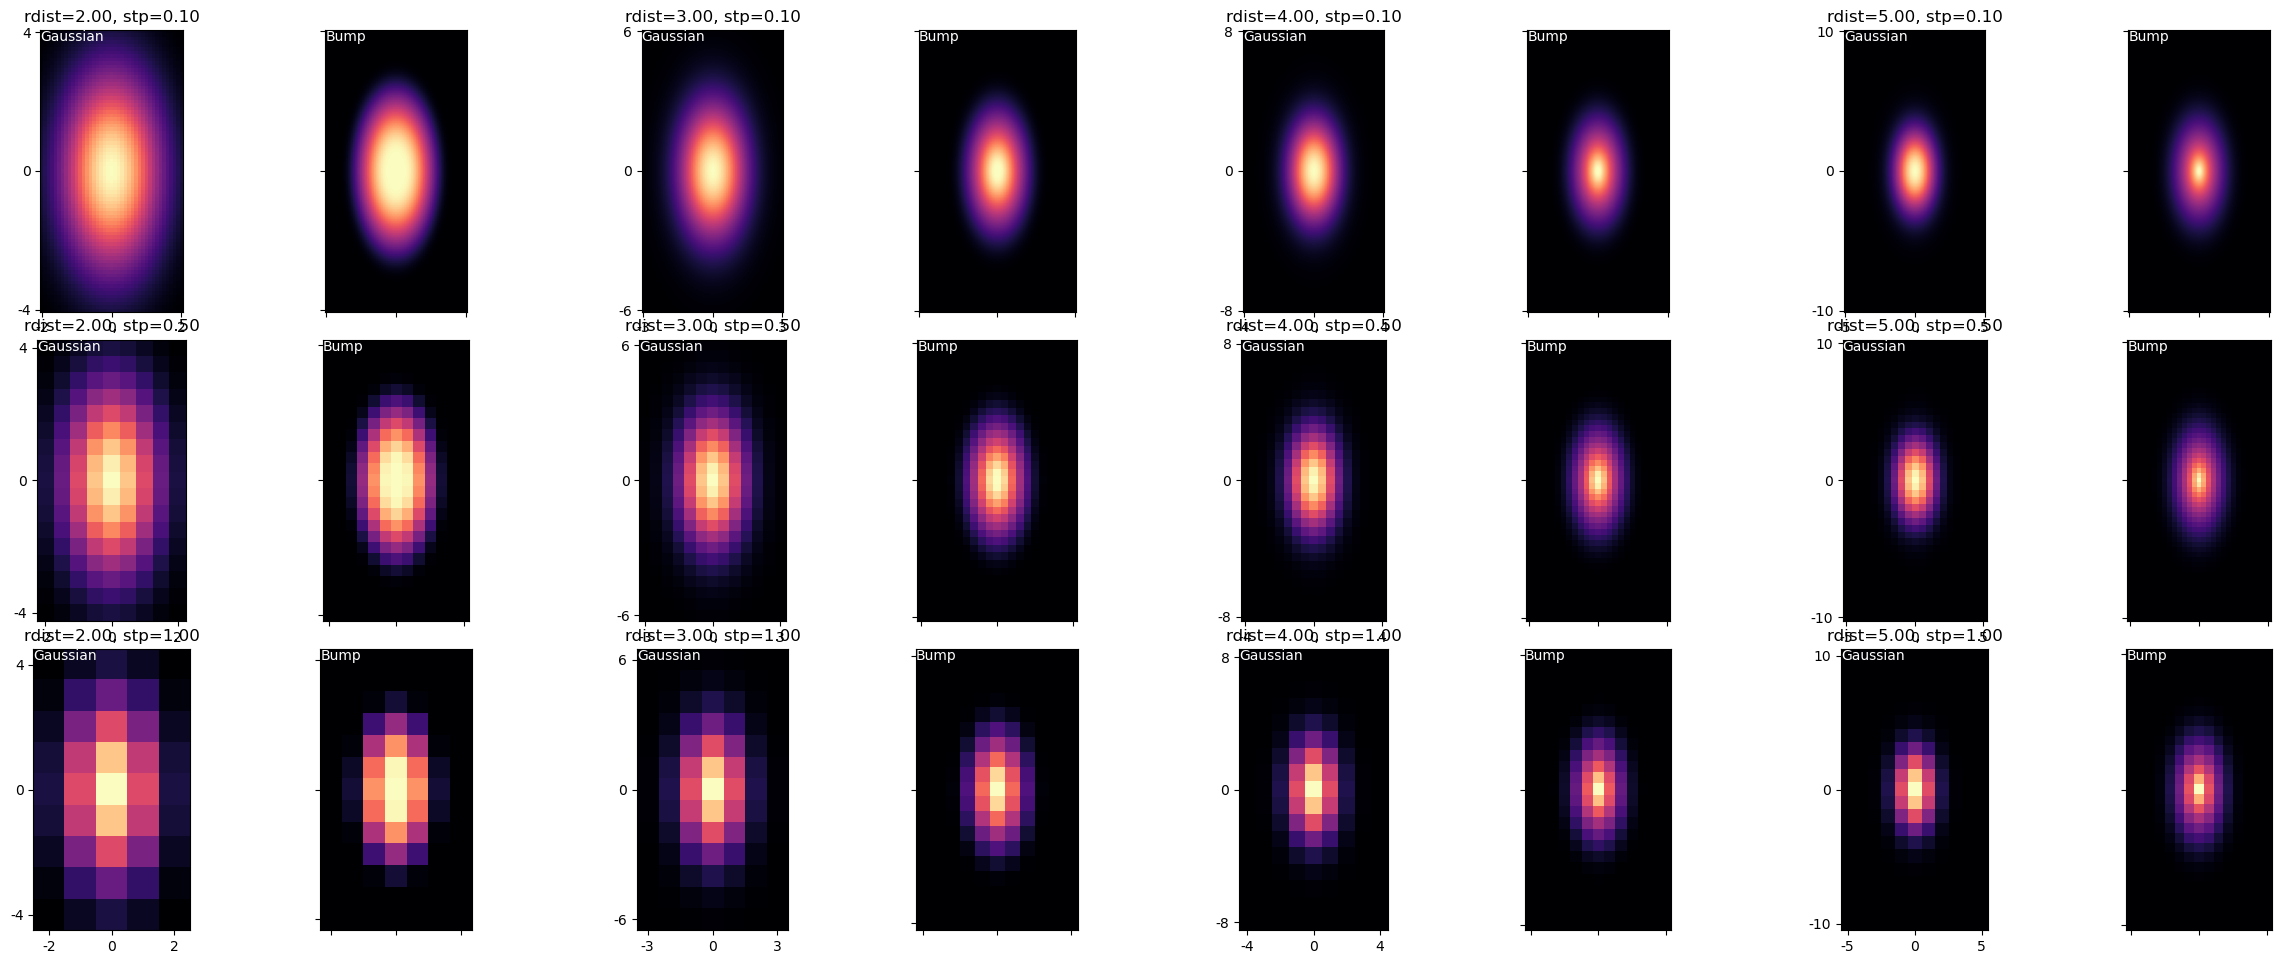

In [10]:
#Plots
n = len(kB)
m = len(kBr)
sz_ = 3
fig = plt.figure(figsize=(sz_*n*2, sz_*m))

wrat = np.tile(np.array([1,1,.1]),n)
gs = GridSpec(m,n*3,top=1, bottom=0, left=0., right=1, hspace=.1, wspace=0.02, width_ratios=wrat)
for nn in range(n):
    for mm in range(m):
        #Gaussian
        ax = fig.add_subplot(gs[mm,nn*3])
        ax.imshow(kG[nn][mm],origin='lower',cmap='magma')
        ax.set_title('rdist={:.2f}, stp={:.2f}'.format(rdistA[nn],rstpA[mm]))
        ax.text(-.5,kG[nn][mm].shape[0]-.5,'Gaussian',color='w',ha='left',va='top')
        #ticks
        xs = np.array([(kG[nn][mm].shape[1]-1)/2, rstpA[mm]])
        xsxticks = np.array([0,xs[0],kG[nn][mm].shape[1]-1])
        xsxtstr = ["%.0f" % x for x in (xsxticks-xs[0])*xs[1]]
        ax.set_xticks(xsxticks)
        ax.set_xticklabels(xsxtstr)
        ys = np.array([(kG[nn][mm].shape[0]-1)/2, rstpA[mm]])
        ysyticks = np.array([0,ys[0],kG[nn][mm].shape[0]-1])
        ysytstr = ["%.0f" % y for y in (ysyticks-ys[0])*ys[1]]
        ax.set_yticks(ysyticks)
        ax.set_yticklabels(ysytstr)

        #Bump
        ax2 = fig.add_subplot(gs[mm,nn*3+1])
        ax2.imshow(kB[nn][mm],origin='lower',cmap='magma')
        ax2.text(-.5,kB[nn][mm].shape[0]-.5,'Bump',color='w',ha='left',va='top')
        #ticks
        xs = np.array([(kB[nn][mm].shape[1]-1)/2, rstpA[mm]])
        xsxticks = np.array([0,xs[0],kB[nn][mm].shape[1]-1])
        #xsxtstr = ["%.2f" % x for x in (xsxticks-xs[0])*xs[1]]
        ax2.set_xticks(xsxticks)
        #ax.set_xticklabels(xsxtstr)
        ax2.set_xticklabels([])
        ys = np.array([(kB[nn][mm].shape[0]-1)/2, rstpA[mm]])
        ysyticks = np.array([0,ys[0],kB[nn][mm].shape[0]-1])
        #ysytstr = ["%.2f" % y for y in (ysyticks-ys[0])*ys[1]]
        ax2.set_yticks(ysyticks)
        #ax.set_yticklabels(ysytstr)
        ax2.set_yticklabels([])


# 2D: Randomize parameters

In [11]:
#constant values
normMethod = 'Integrate'
k_BumpHWHMScalar = 2*np.log(2)      #scalar to roughly match the sigma input for the gaussian & half-width-half-max input for the bump function

#### Randomized Parameters ####
N = 16      #number of kernels to generate
#Set ranges [min,max]
sig1_range = [1,4]
sig2_range = [1,4]
theta_range = [-45,45]
rscalar_intscalar = [2,8]
rstp_enum = np.array([.01,.02,.05,.1,.2,.5,1])
#get random parameters
s1 = np.random.rand(N,) * (sig1_range[1]-sig1_range[0]) + sig1_range[0]
s2 = np.random.rand(N,) * (sig2_range[1]-sig2_range[0]) + sig2_range[0]
theta = np.random.rand(N,) * (theta_range[1]-theta_range[0]) + theta_range[0]
rscalar = np.random.randint(rscalar_intscalar[0],rscalar_intscalar[1],(N,))
rstp = rstp_enum[np.random.randint(0,len(rstp_enum)-1,(N,))]

#### Create Kernels
kB = []     #list of Bump Kernels
kG = []     #list of Gauss Kernels
#loop through settings
for i in range(N):
    s=np.array([s1[i],s2[i]])
    lp_theta = np.deg2rad(theta[i])
    M = np.array([[np.cos(lp_theta), -np.sin(lp_theta)],[np.sin(lp_theta), np.cos(lp_theta)]])
    #k_rdist = np.squeeze(rdist[i]*s)
    #Gaussian
    temp = gKernel2D(s, M=M, rscalar=rscalar[i], rstp=rstp[i], normMethod=normMethod)
    kG.append(temp)
    #Bump
    temp = bKernel2D(s*k_BumpHWHMScalar, M=M, rdist=rscalar[i]*s, rstp=rstp[i], normMethod=normMethod)
    kB.append(temp)

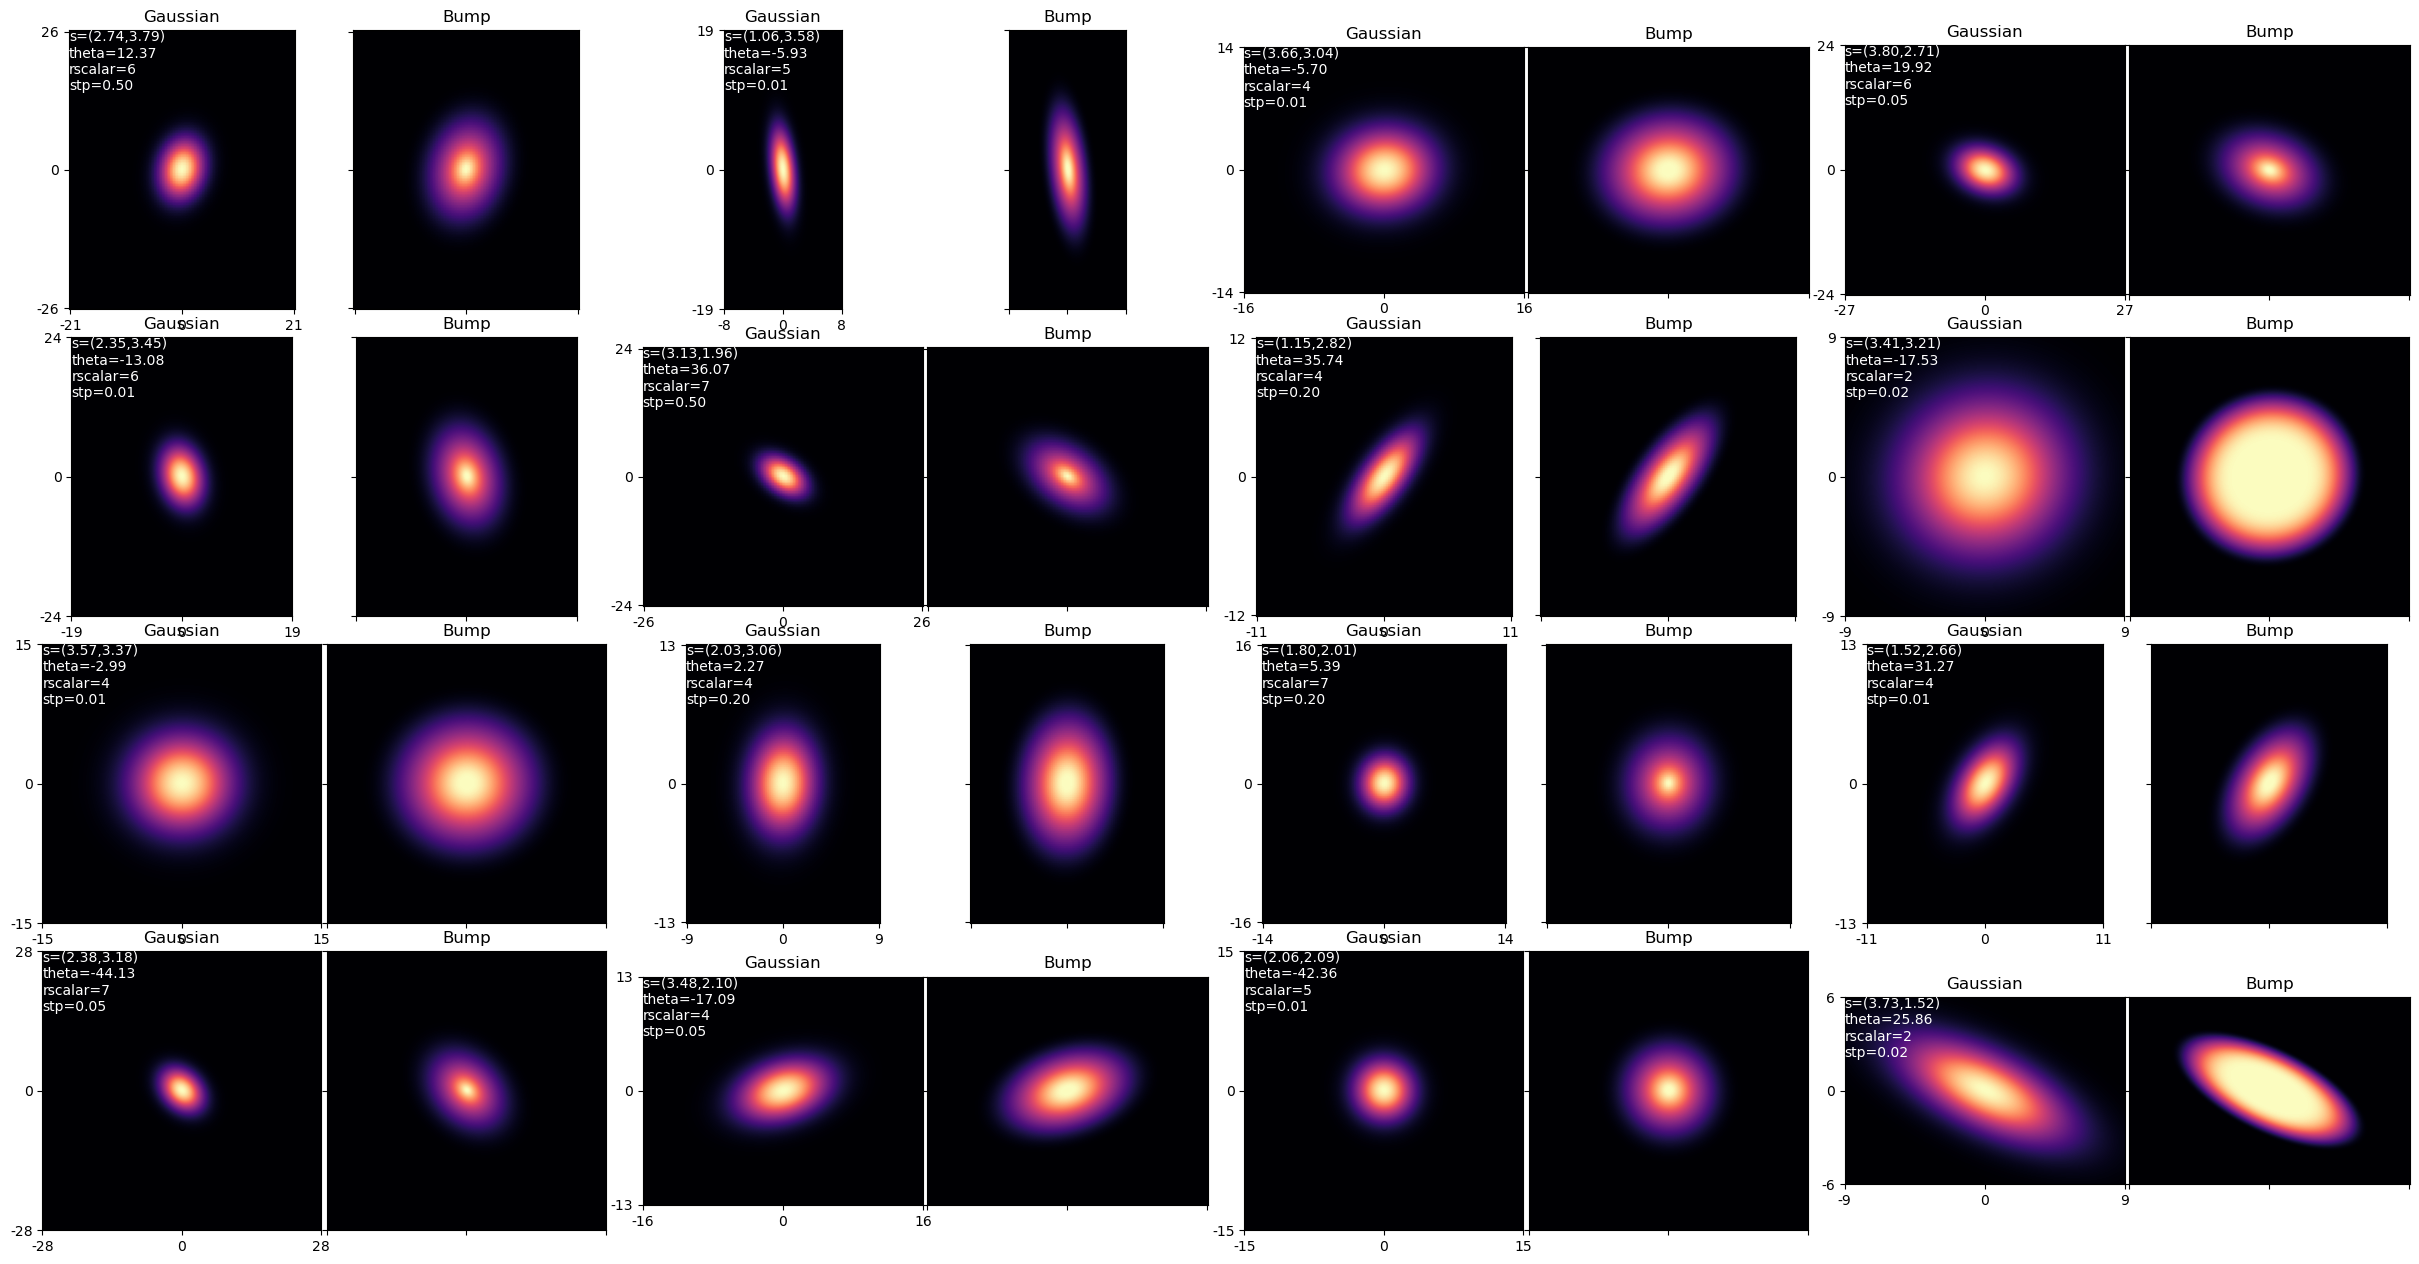

In [12]:
#Plots
n = 4                           #columnsize
m = np.ceil(N/n).astype('int')  #rowsize
fig = plt.figure(figsize=(6*n, 3*m))
wrat = np.tile(np.array([1,1,.1]),n)
gs = GridSpec(m,n*3,top=1, bottom=0, left=0., right=1, hspace=.1, wspace=0.02, width_ratios=wrat)
for nn in range(n):
    for mm in range(m):
        i = nn*n+mm
        #Gaussian
        ax = fig.add_subplot(gs[mm,nn*3])
        ax.imshow(kG[i],origin='lower',cmap='magma')
        ax.set_title('Gaussian')
        #ax.set_title('s=({:.2f},{:.2f}), theta={:.2f}'.format(s1[i],s2[i],theta[i]))
        str = 's=({:.2f},{:.2f}){}theta={:.2f}{}rscalar={:d}{}stp={:.2f}'.format(s1[i],s2[i],'\n',theta[i],'\n',rscalar[i],'\n',rstp[i])
        ax.text(-.5,kG[i].shape[0]-.5,str,color='w',ha='left',va='top')
        #ticks
        xs = np.array([(kG[i].shape[1]-1)/2, rstp[i]])
        xsxticks = np.array([0,xs[0],kG[i].shape[1]-1])
        xsxtstr = ["%.0f" % x for x in (xsxticks-xs[0])*xs[1]]
        ax.set_xticks(xsxticks)
        ax.set_xticklabels(xsxtstr)
        ys = np.array([(kG[i].shape[0]-1)/2, rstp[i]])
        ysyticks = np.array([0,ys[0],kG[i].shape[0]-1])
        ysytstr = ["%.0f" % y for y in (ysyticks-ys[0])*ys[1]]
        ax.set_yticks(ysyticks)
        ax.set_yticklabels(ysytstr)

        #Bump
        ax2 = fig.add_subplot(gs[mm,nn*3+1])
        ax2.imshow(kB[i],origin='lower',cmap='magma')
        #ax2.text(-.5,kB[i].shape[1]-.5,'Bump',color='w',ha='left',va='top')
        ax2.set_title('Bump')
        #ticks
        xs = np.array([(kB[i].shape[1]-1)/2, rstp[i]])
        xsxticks = np.array([0,xs[0],kB[i].shape[1]-1])
        ax2.set_xticks(xsxticks)
        ax2.set_xticklabels([])
        ys = np.array([(kB[i].shape[0]-1)/2, rstp[i]])
        ysyticks = np.array([0,ys[0],kB[i].shape[0]-1])
        ax2.set_yticks(ysyticks)
        ax2.set_yticklabels([])